In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from methods import *
sns.set(rc = {'figure.figsize':(15,8)})


df = pd.read_csv('../data/analysis/test_2022-07-01.csv')
df['correct'] = df['y'] == df['pred']

In [21]:
accuracies_df = df.groupby(by=['method', 'seed']).sum()['correct'].reset_index()

accuracies_df['accuracy'] = accuracies_df['correct']/ 65

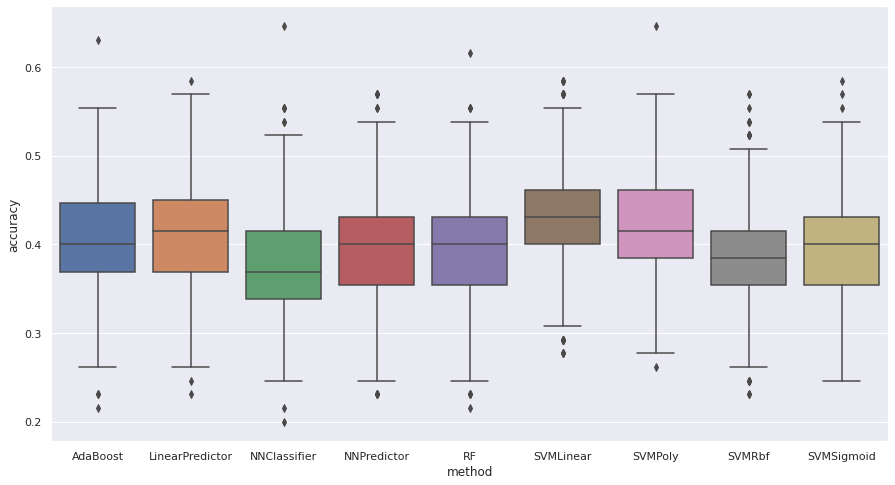

In [22]:
ax = sns.boxplot(x="method", y="accuracy", data=accuracies_df)

In [14]:
df['method'].unique()

array(['LinearPredictor', 'SVMLinear', 'SVMPoly', 'SVMRbf', 'SVMSigmoid',
       'RF', 'AdaBoost', 'NNPredictor', 'NNClassifier'], dtype=object)

LinearPredictor


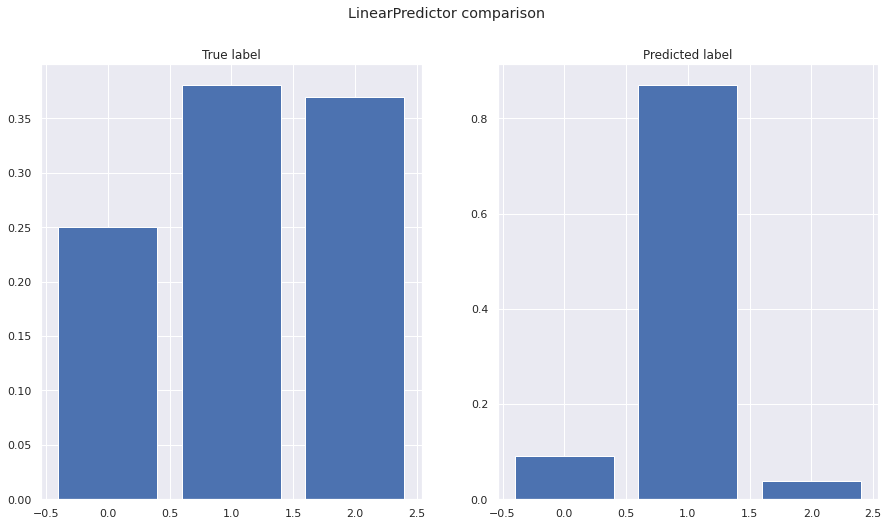

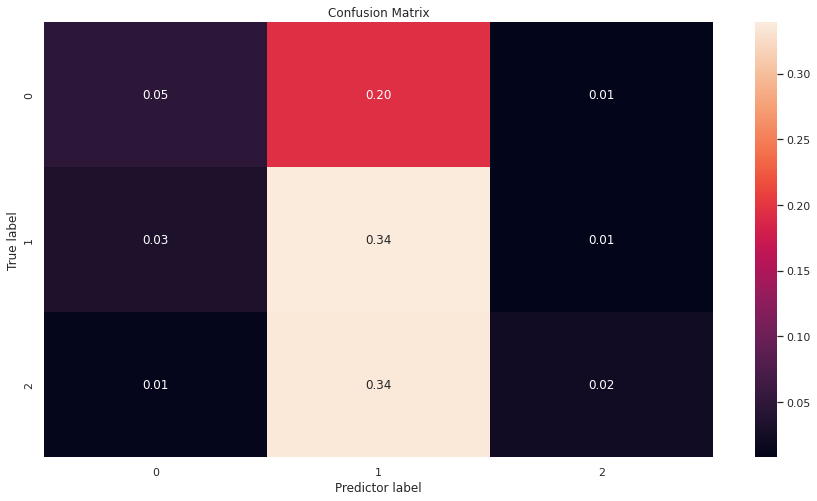

 Accuracy:  0.4092121212121212 


SVMLinear


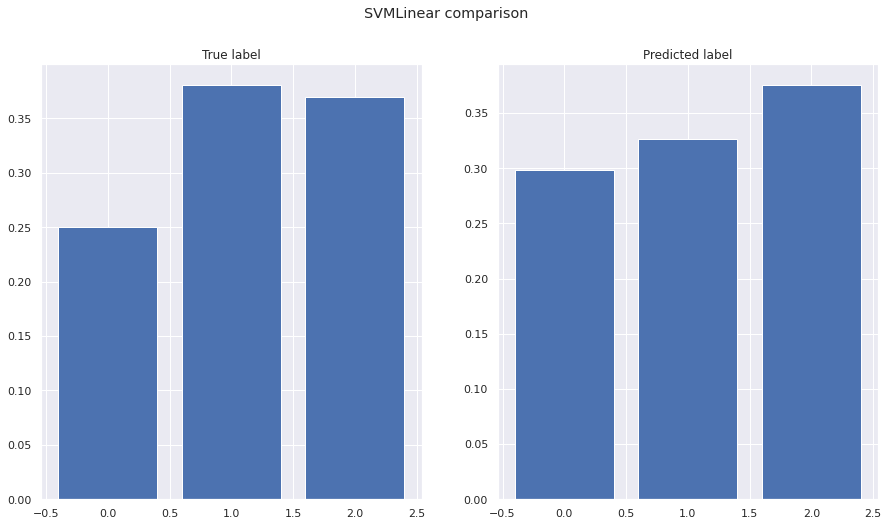

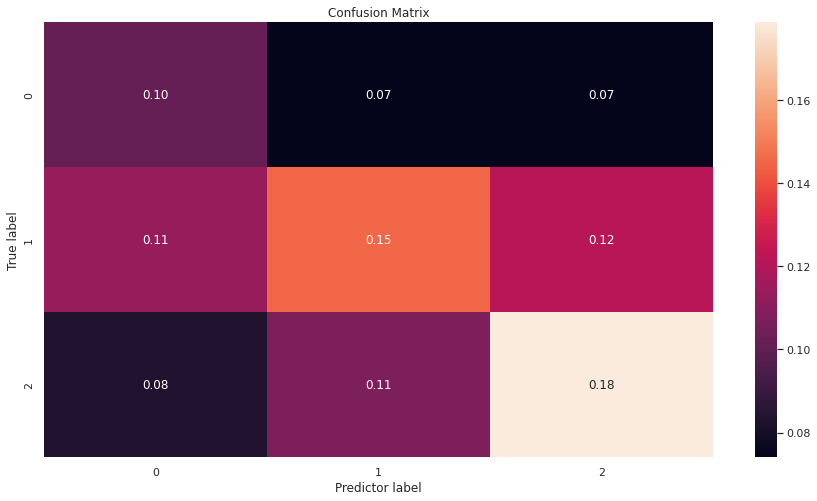

 Accuracy:  0.4251969696969697 


SVMPoly


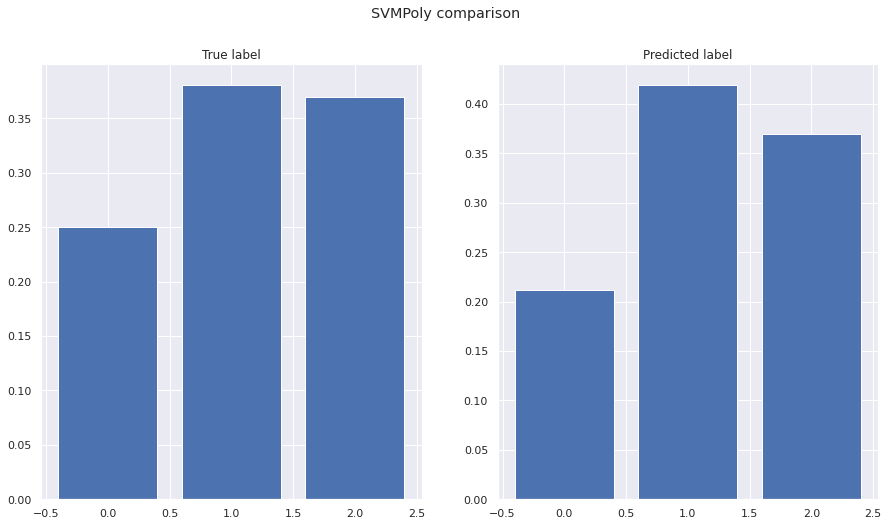

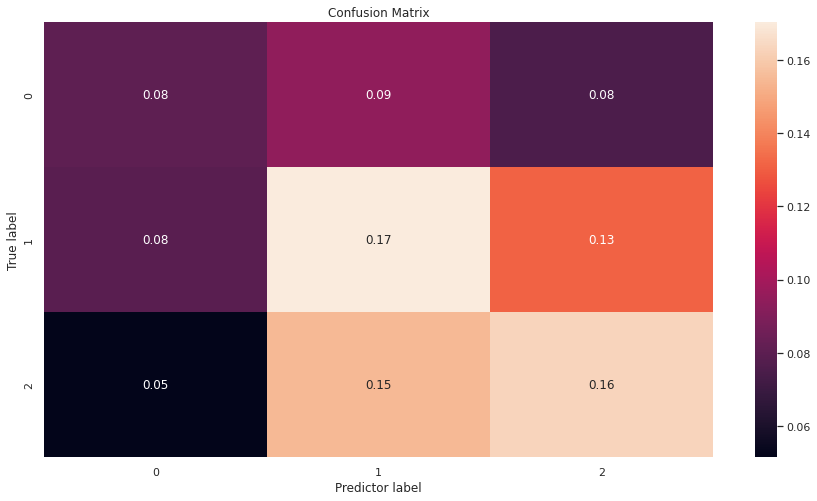

 Accuracy:  0.4138030303030303 


SVMRbf


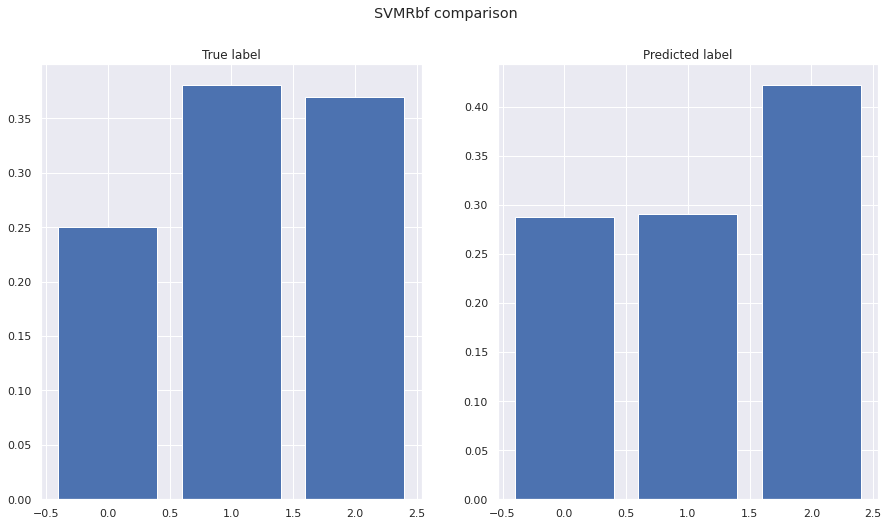

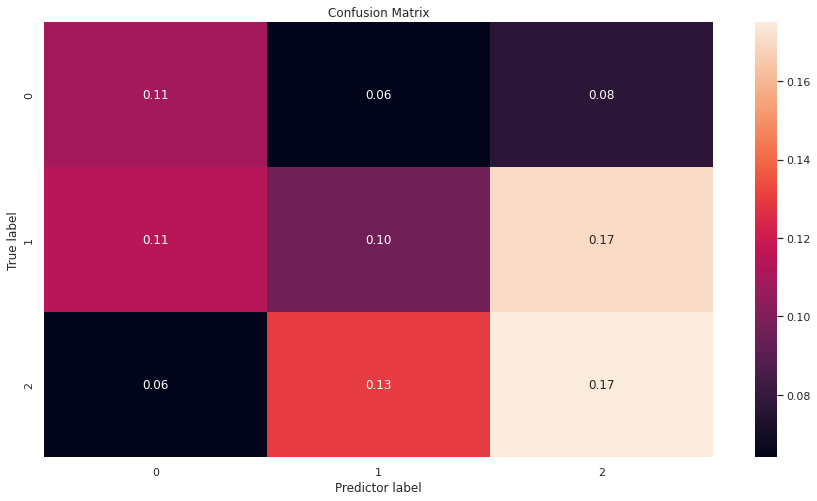

 Accuracy:  0.3804545454545455 


SVMSigmoid


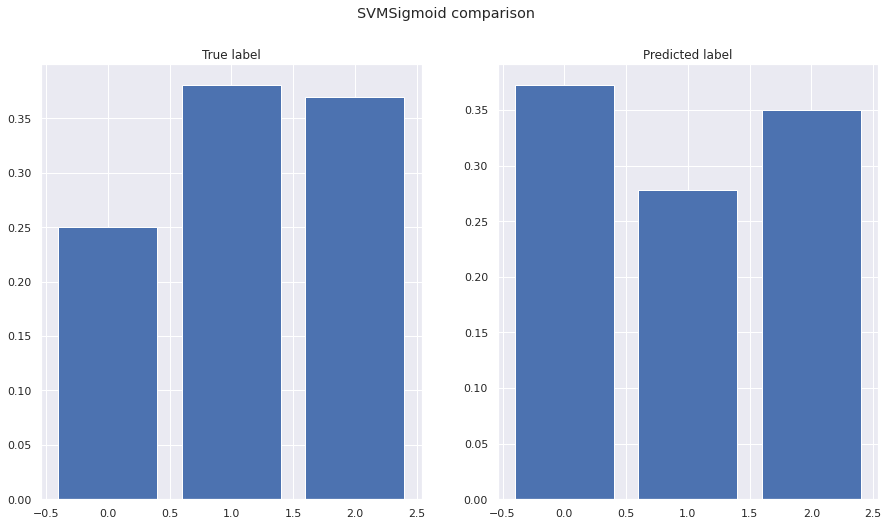

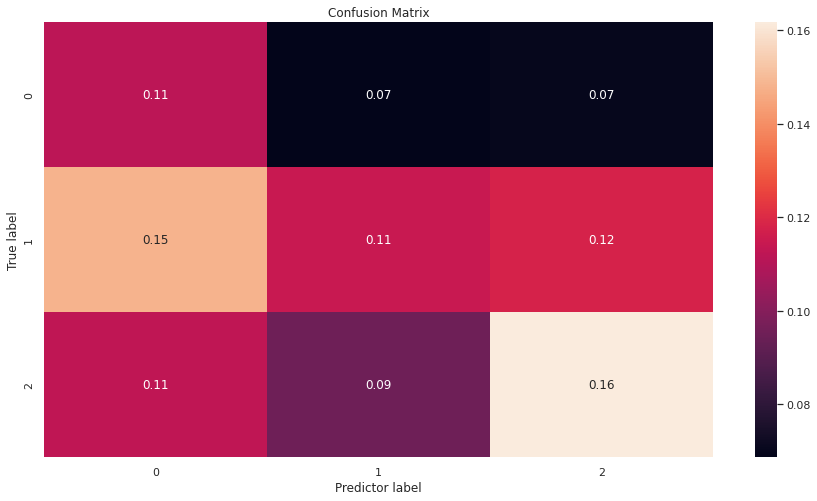

 Accuracy:  0.3881969696969697 


RF


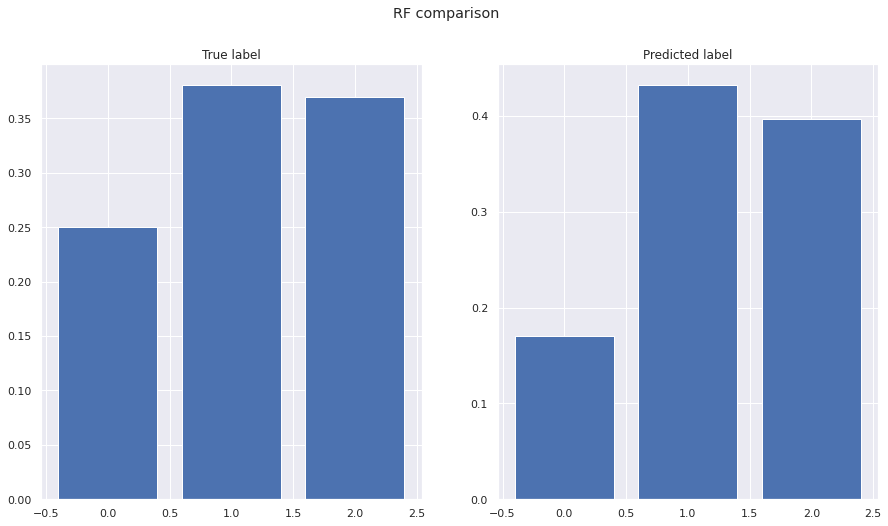

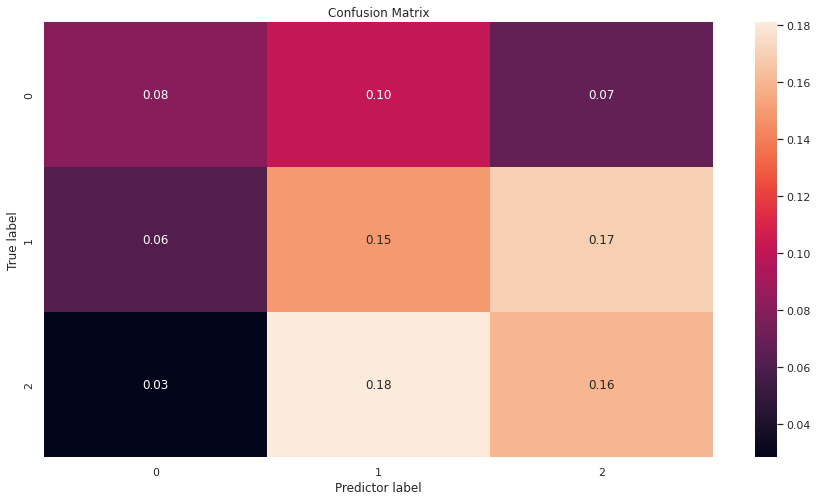

 Accuracy:  0.3893333333333333 


AdaBoost


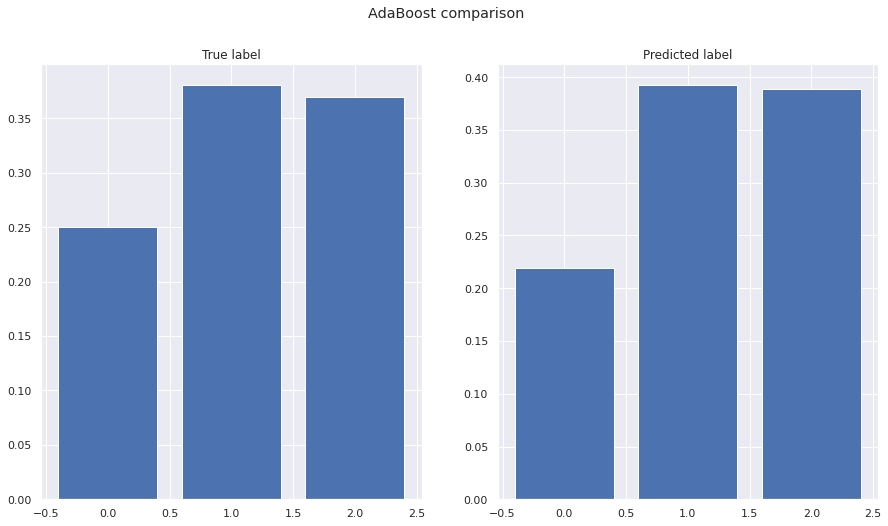

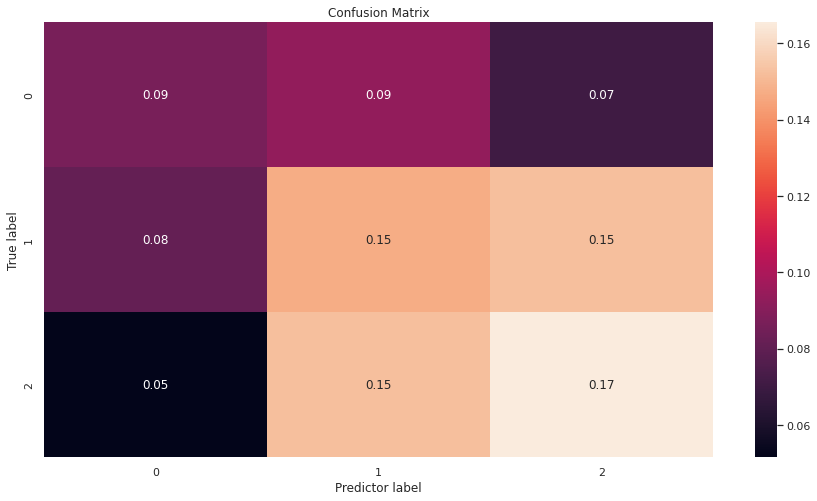

 Accuracy:  0.39904545454545454 


NNPredictor


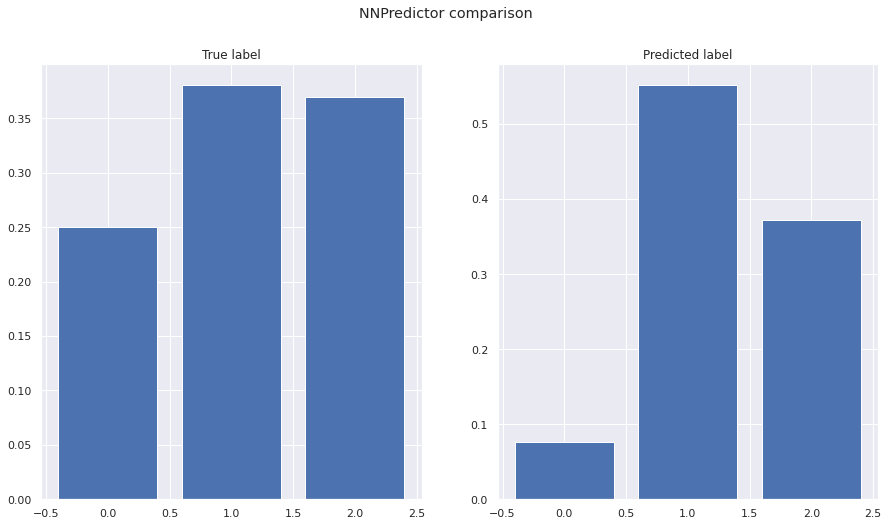

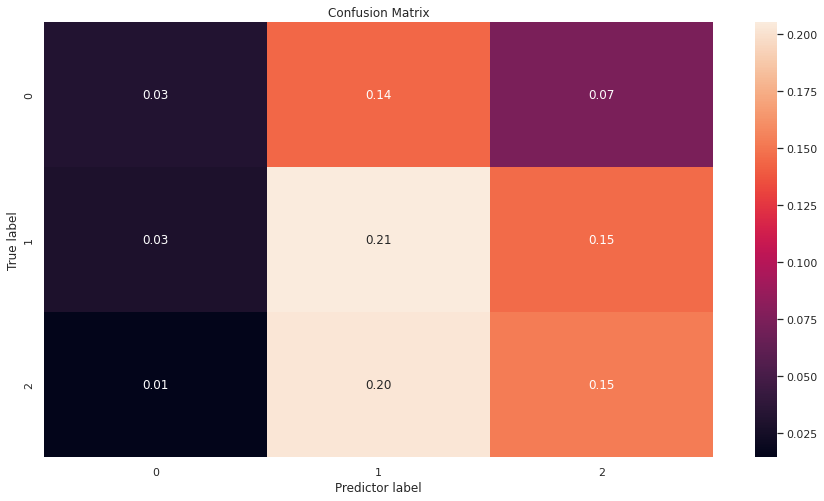

 Accuracy:  0.38948484848484843 


NNClassifier


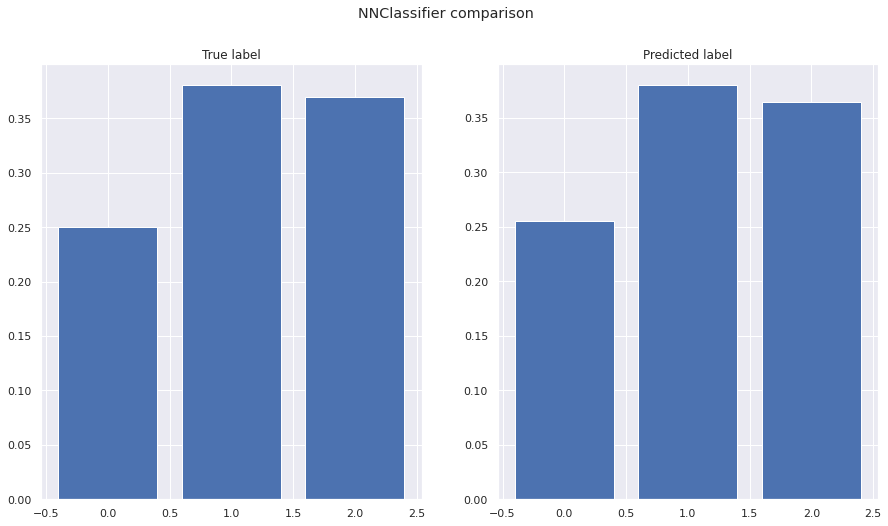

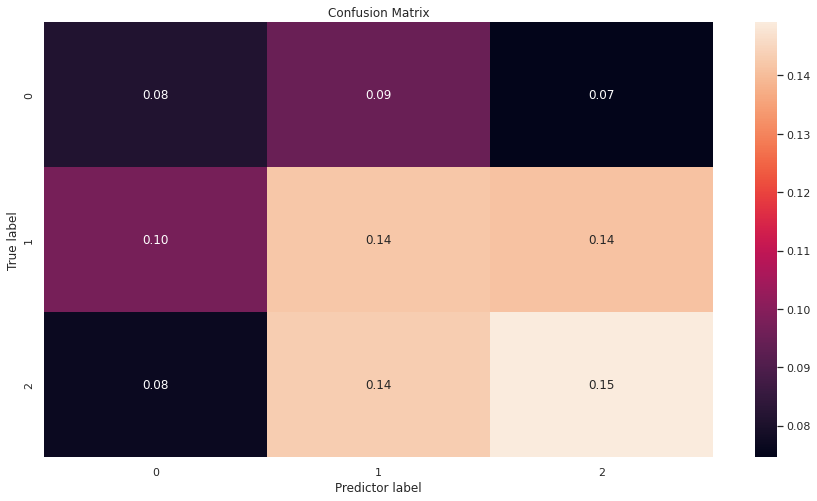

 Accuracy:  0.37216666666666665 




In [15]:
for method in df['method'].unique():
    print(method)

    method_df = df[df['method'] == method]

    cm = confusion_matrix(method_df['y'], method_df['pred'])
    cm = cm/cm.sum()

    fig, axs = plt.subplots(1,2)
    fig.suptitle(f'{method} comparison')
    axs[0].bar([0,1,2], cm.sum(axis=1))
    axs[0].title.set_text('True label')
    axs[1].bar([0,1,2], cm.sum(axis=0))
    axs[1].title.set_text('Predicted label')
    plt.show()

    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title('Confusion Matrix')
    plt.xlabel('Predictor label')
    plt.ylabel('True label')
    plt.show()




    print(' Accuracy: ', np.trace(cm),'\n\n')